In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv('https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_bme_surface-flask_1_ccgg_month.txt',
    delimiter="\s+",skiprows=54, names=['site',	'year',	'month',	'value'])
df

,site,year,month,value
0,BME,1989,2,357.02
1,BME,1989,3,357.73
2,BME,1989,4,358.11
3,BME,1989,5,356.21
4,BME,1989,6,352.76
...,...,...,...,...
232,BME,2008,6,387.78
233,BME,2008,7,386.13
234,BME,2008,8,383.11
235,BME,2008,9,380.76


In [31]:
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1)).dt.to_period('M')

In [32]:
df['date'].dtype

period[M]

In [33]:
df=df.set_index(df['date'])

<Axes: xlabel='date'>

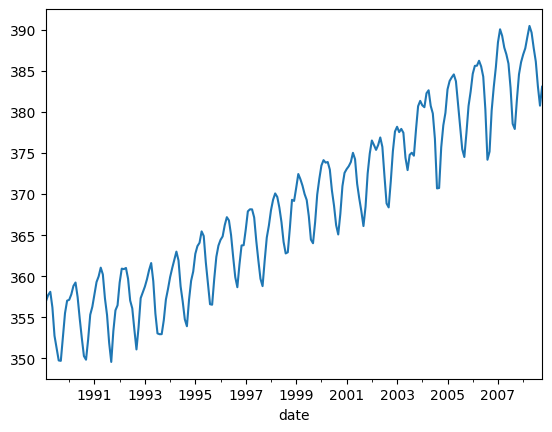

In [34]:
df['value'].plot()

In [35]:
def fft(x):    # use our y value from our plot/data as x here...
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    return np.array( [even[k] + np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] + \
                     [even[k] - np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] )

In [36]:
df

,site,year,month,value,date
date,,,,,
1989-02,BME,1989,2,357.02,1989-02
1989-03,BME,1989,3,357.73,1989-03
1989-04,BME,1989,4,358.11,1989-04
1989-05,BME,1989,5,356.21,1989-05
1989-06,BME,1989,6,352.76,1989-06
...,...,...,...,...,...
2008-06,BME,2008,6,387.78,2008-06
2008-07,BME,2008,7,386.13,2008-07
2008-08,BME,2008,8,383.11,2008-08


In [68]:
df['months'] = [m.n for m in (df.index-df.index[0])]  # creating new months colummn

In [96]:
df

,site,year,month,value,date,months
date,,,,,,
1989-02,BME,1989,2,357.02,1989-02,0
1989-03,BME,1989,3,357.73,1989-03,1
1989-04,BME,1989,4,358.11,1989-04,2
1989-05,BME,1989,5,356.21,1989-05,3
1989-06,BME,1989,6,352.76,1989-06,4
...,...,...,...,...,...,...
2008-06,BME,2008,6,387.78,2008-06,232
2008-07,BME,2008,7,386.13,2008-07,233
2008-08,BME,2008,8,383.11,2008-08,234


<Axes: xlabel='date'>

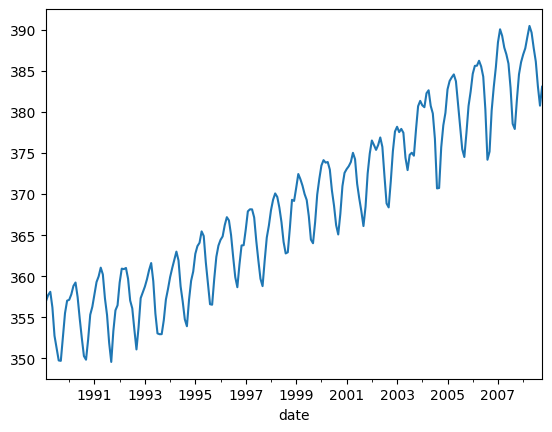

In [70]:
df['value'].plot()

In [71]:
len(df['value']) # should be 2^n...
# if so, use: fft(df['value'])
# if its not, use something like: fft(df['value'] [-512:])

# N = 2^n is really fast

237

In [91]:
X = fft( df['value'][:128] ) #cutting data into the 2**7 amount

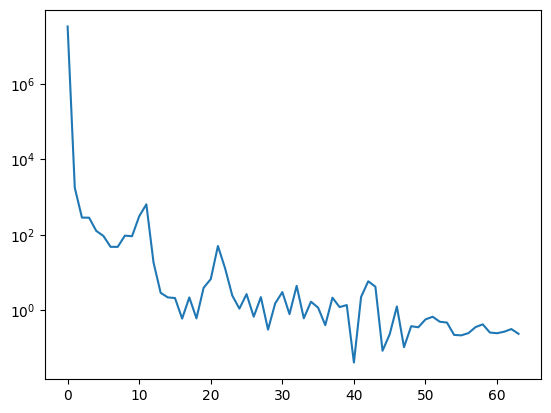

In [92]:
plt.plot(np.abs(X[:int(len(X)/2)])**2/int(len(X)/2))
plt.yscale("log")
#plt.xlim(0,50)